## NBA Player Salary Analysis - SaiSuhas Tummala

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

The above code imports the needed math, plotting and regression models.

In [2]:
data = pd.read_excel('D:\\VSCODE\\NBASalaryAnalysis2024\\CombinedNBAStatsSalaries.xlsx')

This transforms the Excel file containing player names, stats, and salary into a Pandas Data Frame.

In [3]:
stats = ['Age','G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 
            'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 
            'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 
            'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']

X = data[stats]
y = data['Salaries']

In [4]:
# training a random forest model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X, y)

# predict nba player salary with the RF model
rf_predictions = rf_regressor.predict(X)

# linear reg model training
lr_regressor = LinearRegression()
lr_regressor.fit(X, y)

# LR predictions
lr_predictions = lr_regressor.predict(X)

# KNeighbors model
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X, y)

# KNN model predicts NBA salary
knn_predictions = knn_regressor.predict(X)

average_predictions = (rf_predictions + lr_predictions + knn_predictions) / 3

In [5]:
data['RF_Predicted_Salary'] = rf_predictions
data['LR_Predicted_Salary'] = lr_predictions
data['KNN_Predicted_Salary'] = knn_predictions
data['Average Predicted Salary'] = average_predictions

# makes excel file
data.to_excel('predicted_salaries_with_three_models&avg.xlsx', index=False)

In [6]:
stats_importances = rf_regressor.feature_importances_ # get how important each stat is 
indices = np.argsort(stats_importances)[::-1] # this should reverse the order of the array that is returned from the arg sort so decending
sorted_stats = [stats[i] for i in indices] # sorts by importance

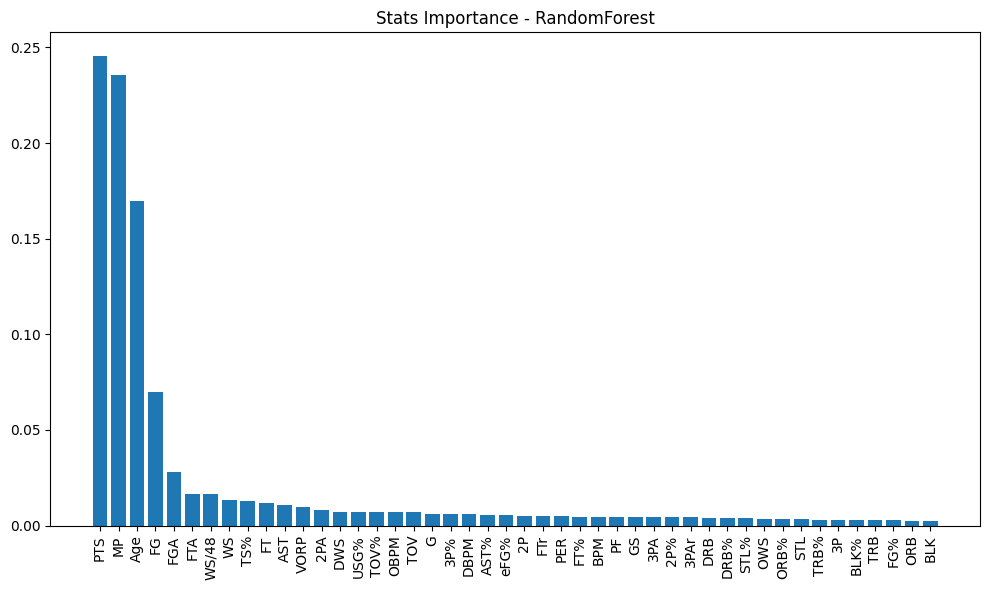

In [7]:
plt.figure(figsize=(10, 6))
plt.title("Stats Importance - RandomForest")
plt.bar(range(len(stats_importances)), stats_importances[indices], align="center") # creating a bar chart of the feature importance
plt.xticks(range(len(stats_importances)), sorted_stats, rotation=90)
plt.tight_layout()
plt.show()

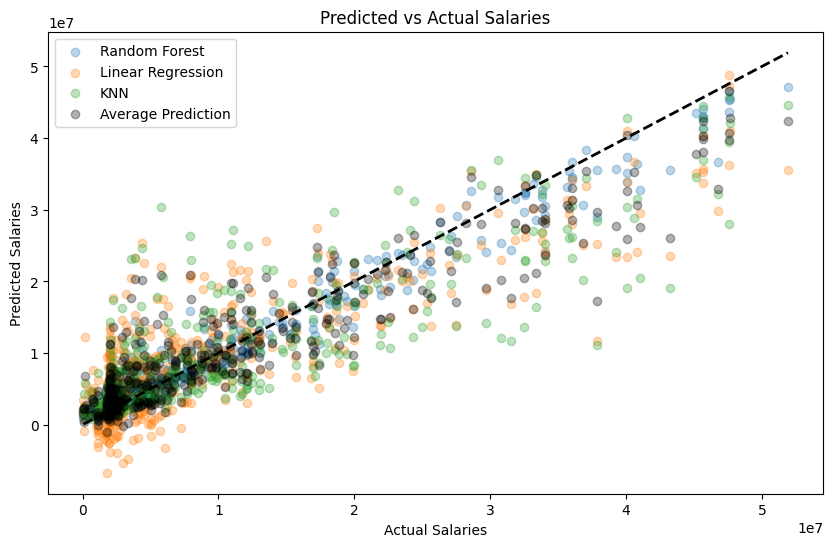

In [8]:
# scatter plot of the four models with actual shown as a reference line
plt.figure(figsize=(10, 6))
plt.scatter(y, rf_predictions, alpha=0.3, label='Random Forest') 
plt.scatter(y, lr_predictions, alpha=0.3, label='Linear Regression')
plt.scatter(y, knn_predictions, alpha=0.3, label='KNN')
plt.scatter(y, average_predictions, alpha=0.3, label = 'Average Prediction', color='black')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual Salaries")
plt.ylabel("Predicted Salaries")
plt.title("Predicted vs Actual Salaries")
plt.legend()
plt.show()

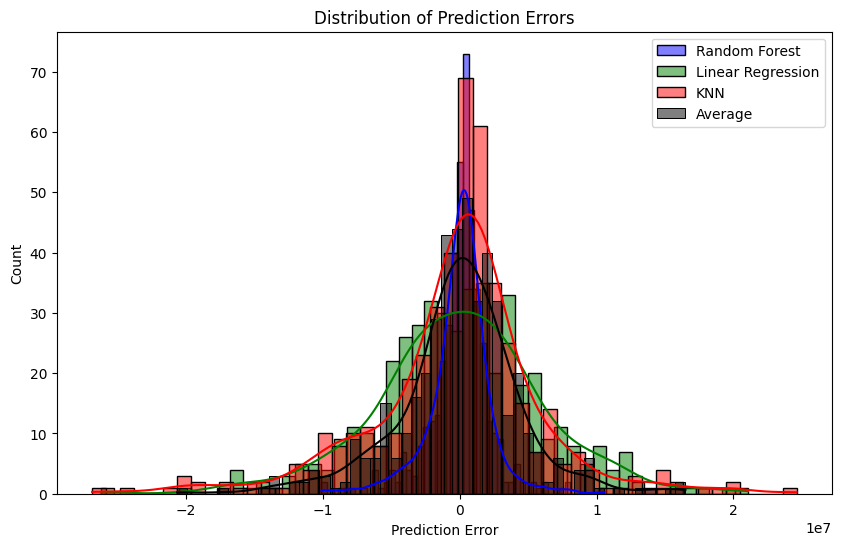

In [9]:
# creating a historgram with how far the prediction is from the actual salary
rf_errors = rf_predictions - y
lr_errors = lr_predictions - y
knn_errors = knn_predictions - y
avg_errors = average_predictions - y

plt.figure(figsize=(10, 6))
sns.histplot(rf_errors, bins=50, kde=True, color='blue', label='Random Forest')
sns.histplot(lr_errors, bins=50, kde=True, color='green', label='Linear Regression')
sns.histplot(knn_errors, bins=50, kde=True, color='red', label='KNN')
sns.histplot(avg_errors, bins=50, kde=True, color='black', label='Average')
plt.xlabel("Prediction Error")
plt.title("Distribution of Prediction Errors")
plt.legend()
plt.show()

In [10]:
actual = y
rf_pred = rf_predictions
lr_pred = lr_predictions
knn_pred = knn_predictions
avg_pred = average_predictions

# Calculate metrics for Random Forest
rf_mse = mean_squared_error(actual, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(actual, rf_pred)
rf_r2 = r2_score(actual, rf_pred)

# Calculate metrics for Linear Regression
lr_mse = mean_squared_error(actual, lr_pred)
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(actual, lr_pred)
lr_r2 = r2_score(actual, lr_pred)

# Calculate metrics for KNN
knn_mse = mean_squared_error(actual, knn_pred)
knn_rmse = np.sqrt(knn_mse)
knn_mae = mean_absolute_error(actual, knn_pred)
knn_r2 = r2_score(actual, knn_pred)

# Calculate metrics for AVG
avg_mse = mean_squared_error(actual, avg_pred)
avg_rmse = np.sqrt(avg_mse)
avg_mae = mean_absolute_error(actual, avg_pred)
avg_r2 = r2_score(actual, avg_pred)

In [11]:
# Print out the metrics
print("Random Forest:")
print(f"MSE: {rf_mse}, RMSE: {rf_rmse}, MAE: {rf_mae}, R²: {rf_r2}")

print("\nLinear Regression:")
print(f"MSE: {lr_mse}, RMSE: {lr_rmse}, MAE: {lr_mae}, R²: {lr_r2}")

print("\nK-Nearest Neighbors (KNN):")
print(f"MSE: {knn_mse}, RMSE: {knn_rmse}, MAE: {knn_mae}, R²: {knn_r2}")

print("\nAverage:")
print(f"MSE: {avg_mse}, RMSE: {avg_rmse}, MAE: {avg_mae}, R²: {avg_r2}")

Random Forest:
MSE: 5143872054561.005, RMSE: 2268010.5940142795, MAE: 1502056.8950221238, R²: 0.960547258438524

Linear Regression:
MSE: 38036475907893.72, RMSE: 6167371.880136118, MAE: 4659321.424215406, R²: 0.7082658281570517

K-Nearest Neighbors (KNN):
MSE: 38240726599166.195, RMSE: 6183908.68295823, MAE: 4139021.9681415926, R²: 0.7066992554174789

Average:
MSE: 20502572108349.61, RMSE: 4527976.602009954, MAE: 3181756.3763272334, R²: 0.8427482895848823
